In [2]:
import os
import warnings
import pandas as pd
import numpy as np
import re
import glob

from matplotlib import pyplot as plt
from src.notebooks.rolestereotype import RoleStereotype as rs

warnings.filterwarnings('ignore')
# import seaborn as sns

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# sns.set()
# sns.set_style(style='white')
%matplotlib inline

In [3]:
df_mobile = pd.read_csv('results/csv/mobile_ds_rs.csv')
df_desktop = pd.read_csv('results/csv/desktop_ds_rs.csv')

In [4]:
print(f'Mobile: {df_mobile.shape[0]}, Desktop: {df_desktop.shape[0]}')

Mobile: 1793, Desktop: 2465


In [5]:
alldf = pd.concat([df_mobile,df_desktop])

In [6]:
alldf.drop(columns=['Unnamed: 0', 'Project_y'], inplace=True)
alldf.rename(columns={'Project_x': 'Project'}, inplace=True)
alldf.head()

,FullClassPath,Project,SpeculativeGenerality,BaseClassKnowsDerivedClass,MessageChains,LongParameterList,SpaghettiCode,BaseClassShouldBeAbstract,LongMethod,ClassDataShouldBePrivate,...,isInterface,isInnerClass,isClass,isEnum,classPublicity,numPublicMethods,numPrivateMethods,numProtectedMethods,isAbstract,label
0,com.jakewharton.telecine.BugsnagTree,Telecine-v1.6.2,0,0,0,1,0,0,0,0,...,False,False,True,False,default,0,0,0,False,Service Provider
1,com.jakewharton.telecine.CaptureHelper,Telecine-v1.6.2,0,0,0,1,0,0,0,0,...,False,False,True,False,default,0,0,0,False,Service Provider
2,com.jakewharton.telecine.CheatSheet,Telecine-v1.6.2,0,0,0,0,0,0,1,0,...,False,False,True,False,default,0,0,0,False,Service Provider
3,com.jakewharton.telecine.DeleteRecordingBroad...,Telecine-v1.6.2,0,0,0,0,0,0,0,0,...,False,False,True,False,public,0,0,0,False,Service Provider
4,com.jakewharton.telecine.RecordingSession,Telecine-v1.6.2,0,0,0,1,0,0,0,0,...,False,False,True,False,default,0,0,0,False,Interfacer


In [7]:
# all dataset: combined mobile and desktop dataset
# alldf.to_csv('../../results/csv/all.csv')

In [8]:
ds = "SpeculativeGenerality,BaseClassKnowsDerivedClass,MessageChains,LongParameterList,SpaghettiCode,BaseClassShouldBeAbstract,LongMethod,ClassDataShouldBePrivate,TraditionBreaker,ManyFieldAttributesButNotComplex,RefusedParentBequest,SwissArmyKnife,Blob,AntiSingleton,ComplexClass,LargeClass,FunctionalDecomposition,LazyClass".split(",")
len(ds)

18

In [9]:
col = ds.append('label')
temp_df = alldf.groupby('label').sum()
temp_df = temp_df.reindex(['Coordinator', 'Structurer', 'Controller', 'Information Holder', 'Interfacer', 'Service Provider'])
temp_df.reset_index(inplace=True)

In [10]:
ds = ds[0:-1]

In [11]:
# 1. Scatter plot == 

# def multi(n): 
#     return n
# fig, ax = plt.subplots(figsize=(10,8), dpi=1200)

# # ensure color are unique 
color_dict = {
    'SpeculativeGenerality': '#5d4037', 
    'BaseClassKnowsDerivedClass' : '#006064', 
    'MessageChains': '#7b1fa2', 
    'LongParameterList': '#512da8',
    'SpaghettiCode' : '#666f9f', 
    'BaseClassShouldBeAbstract' : '#1976d2',
    'LongMethod' : '#d32f2f', 
    'ClassDataShouldBePrivate': '#388e3c', 
    'TraditionBreaker': '#c2185b', 
    'ManyFieldAttributesButNotComplex': '#3e2723',
    'RefusedParentBequest' : '#00796b', 
    'SwissArmyKnife' : '#9e9e9e',
    'Blob' : '#455a64', 
    'AntiSingleton' : '#b3e5fc', 
    'ComplexClass' : '#afb42b', 
    'LargeClass':'#fbe9e7',
    'FunctionalDecomposition' : '#ffeb3b',
    'LazyClass': '#ffa000'
}

# for antipattern in ds:
    
#     siz = temp_df[antipattern]
#     si = map(multi, siz) 
#     ax.scatter(temp_df['label'],
#                temp_df[antipattern], 
#                s=list(si), label=antipattern, c=color_dict[antipattern])
# ax.set_ylabel('Design Smell Count')
# ax.set_xlabel('Role Stereotypes')
# plt.xticks(rotation=0)
# lgnd = ax.legend(fancybox=True, framealpha=0.4, ncol=1, bbox_to_anchor=[1, 0.9])
# ## setting equal legend marker size
# for i in range(0, 18):
#     lgnd.legend_handles[i]._sizes = [60]
# #plt.savefig('../../results/img/bubble_plot.eps', format='eps')
# plt.show()

In [ ]:
# Identify design smell columns automatically:
design_smell_columns = [
    col for col in temp_df.columns
    if col in ds
]

# Create the sub-dataframe:
bubble_data_ = temp_df[['label'] + design_smell_columns]

In [15]:
bubble_data_.head()

,label,SpeculativeGenerality,BaseClassKnowsDerivedClass,MessageChains,LongParameterList,SpaghettiCode,BaseClassShouldBeAbstract,LongMethod,ClassDataShouldBePrivate,TraditionBreaker,ManyFieldAttributesButNotComplex,RefusedParentBequest,SwissArmyKnife,Blob,AntiSingleton,ComplexClass,LargeClass,FunctionalDecomposition,LazyClass
0,Coordinator,2,0,0,9,0,0,0,0,0,0,0,0,7,0,18,0,0,0
1,Structurer,0,0,1,12,0,6,23,3,0,0,0,1,17,4,52,0,0,0
2,Controller,0,0,0,30,8,3,20,15,0,0,0,0,46,7,73,0,0,2
3,Information Holder,10,0,0,188,0,39,172,144,0,28,88,2,142,45,236,2,0,224
4,Interfacer,0,0,2,188,28,18,629,89,0,3,8,0,23,49,851,0,0,34


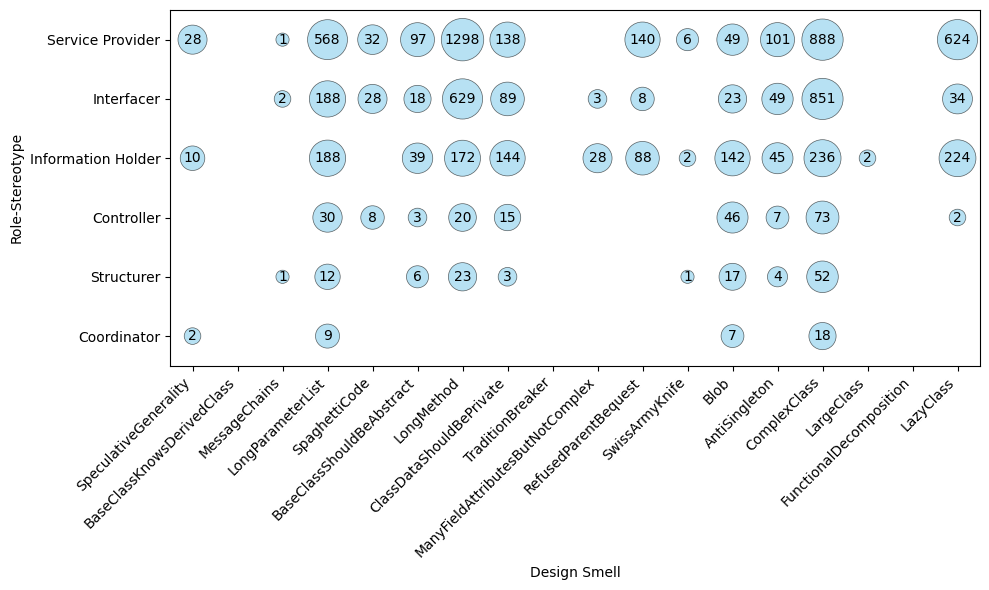

In [19]:
# Prepare the aggregated data
bubble_data = bubble_data_.set_index('label')

# X-axis: Design smells
# Y-axis: Role stereotypes
x_labels = bubble_data.columns.tolist()
y_labels = bubble_data.index.tolist()

x_coords, y_coords, sizes, labels = [], [], [], []

# Before your plotting loop, ensure numeric:
bubble_data = bubble_data.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Now this will work safely:
for x_idx, smell in enumerate(x_labels):
    for y_idx, role in enumerate(y_labels):
        count = bubble_data.loc[role, smell]
        if count > 0:
            x_coords.append(x_idx)
            y_coords.append(y_idx)
            sizes.append(np.log10(count + 1) * 300)
            labels.append(str(count))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    x_coords, y_coords, s=sizes,
    alpha=0.6, color="skyblue", edgecolors="black", linewidth=0.5
)

# Annotate with exact counts
for (x, y, label_text) in zip(x_coords, y_coords, labels):
    ax.text(x, y, label_text, ha='center', va='center', fontsize=10)

# Configure axes
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel("Design Smell")
ax.set_ylabel("Role-Stereotype")
# ax.set_title("Matrix-Based Bubble Plot (Log-Scaled) of Design Smells vs. Role-Stereotypes (Axes Switched)")

ax.set_xlim(-0.5, len(x_labels) - 0.5)
ax.set_ylim(-0.5, len(y_labels) - 0.5)

plt.tight_layout()
plt.savefig('matrix_bubble_plot.pdf', dpi=1200, format='pdf')
plt.show()

In [21]:
# Plot Mobile Only
df_mobile.head()

,Unnamed: 0,FullClassPath,Project_x,SpeculativeGenerality,BaseClassKnowsDerivedClass,MessageChains,LongParameterList,SpaghettiCode,BaseClassShouldBeAbstract,LongMethod,...,isInterface,isInnerClass,isClass,isEnum,classPublicity,numPublicMethods,numPrivateMethods,numProtectedMethods,isAbstract,label
0,0,com.jakewharton.telecine.BugsnagTree,Telecine-v1.6.2,0,0,0,1,0,0,0,...,False,False,True,False,default,0,0,0,False,Service Provider
1,1,com.jakewharton.telecine.CaptureHelper,Telecine-v1.6.2,0,0,0,1,0,0,0,...,False,False,True,False,default,0,0,0,False,Service Provider
2,2,com.jakewharton.telecine.CheatSheet,Telecine-v1.6.2,0,0,0,0,0,0,1,...,False,False,True,False,default,0,0,0,False,Service Provider
3,4,com.jakewharton.telecine.DeleteRecordingBroad...,Telecine-v1.6.2,0,0,0,0,0,0,0,...,False,False,True,False,public,0,0,0,False,Service Provider
4,5,com.jakewharton.telecine.RecordingSession,Telecine-v1.6.2,0,0,0,1,0,0,0,...,False,False,True,False,default,0,0,0,False,Interfacer


In [50]:
col = ds.append('label')
mobile_temp_df = df_mobile.groupby('label').sum()
mobile_temp_df = mobile_temp_df.reindex(['Coordinator', 'Structurer', 'Controller', 'Information Holder', 'Interfacer', 'Service Provider'])
mobile_temp_df.reset_index(inplace=True)

In [51]:
# Identify design smell columns automatically:
design_smell_columns = [
    col for col in mobile_temp_df.columns
    if col in ds
]

# Create the sub-dataframe:
mobile_bubble_data = mobile_temp_df[design_smell_columns]

In [52]:
mobile_bubble_data.head()

,label,SpeculativeGenerality,BaseClassKnowsDerivedClass,MessageChains,LongParameterList,SpaghettiCode,BaseClassShouldBeAbstract,LongMethod,ClassDataShouldBePrivate,TraditionBreaker,ManyFieldAttributesButNotComplex,RefusedParentBequest,SwissArmyKnife,Blob,AntiSingleton,ComplexClass,LargeClass,FunctionalDecomposition,LazyClass
0,Coordinator,2,0,0,6,0,0,0,0,0,0,0,0,1,0,14,0,0,0
1,Structurer,0,0,0,7,0,6,3,2,0,0,0,0,11,1,18,0,0,0
2,Controller,0,0,0,14,0,0,10,10,0,0,0,0,2,5,32,0,0,0
3,Information Holder,2,0,0,61,0,9,37,90,0,7,0,0,30,11,89,2,0,70
4,Interfacer,0,0,0,84,4,3,345,54,0,3,0,0,10,22,481,0,0,8


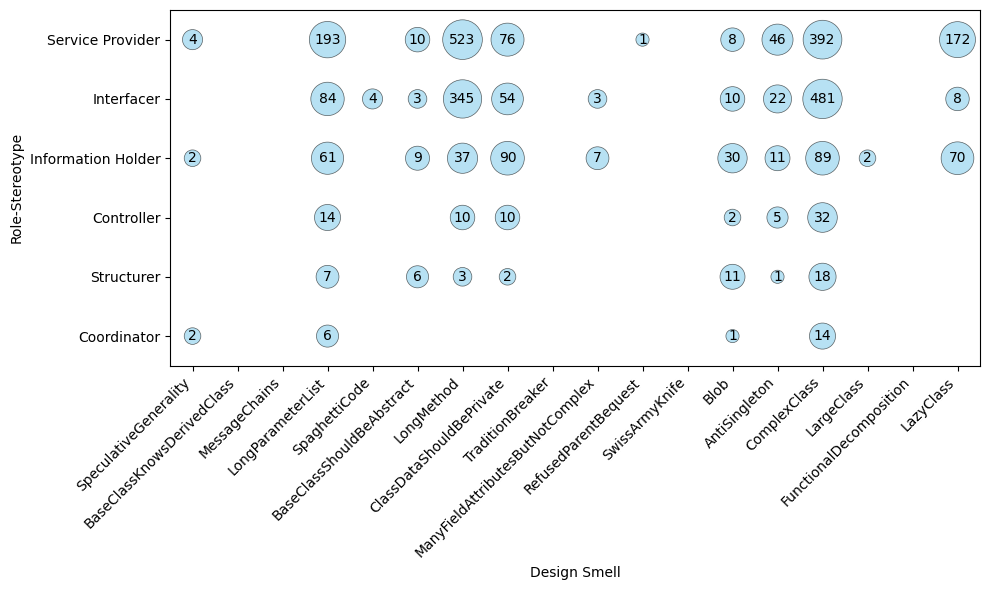

In [53]:
# Prepare the aggregated data
bubble_data = mobile_bubble_data.set_index('label')

# X-axis: Design smells
# Y-axis: Role stereotypes
x_labels = bubble_data.columns.tolist()
y_labels = bubble_data.index.tolist()

x_coords, y_coords, sizes, labels = [], [], [], []

# Before your plotting loop, ensure numeric:
bubble_data = bubble_data.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Now this will work safely:
for x_idx, smell in enumerate(x_labels):
    for y_idx, role in enumerate(y_labels):
        count = bubble_data.loc[role, smell]
        if count > 0:
            x_coords.append(x_idx)
            y_coords.append(y_idx)
            sizes.append(np.log10(count + 1) * 300)
            labels.append(str(count))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    x_coords, y_coords, s=sizes,
    alpha=0.6, color="skyblue", edgecolors="black", linewidth=0.5
)

# Annotate with exact counts
for (x, y, label_text) in zip(x_coords, y_coords, labels):
    ax.text(x, y, label_text, ha='center', va='center', fontsize=10)

# Configure axes
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel("Design Smell")
ax.set_ylabel("Role-Stereotype")
# ax.set_title("Matrix-Based Bubble Plot (Log-Scaled) of Design Smells vs. Role-Stereotypes (Axes Switched)")

ax.set_xlim(-0.5, len(x_labels) - 0.5)
ax.set_ylim(-0.5, len(y_labels) - 0.5)

plt.tight_layout()
plt.savefig('mobile_matrix_bubble_plot.pdf', dpi=1200, format='pdf')
plt.show()

In [66]:
# Plot desktop only:
df_desktop.head()

,Unnamed: 0,FullClassPath,Project_x,SpeculativeGenerality,BaseClassKnowsDerivedClass,MessageChains,LongParameterList,SpaghettiCode,BaseClassShouldBeAbstract,LongMethod,...,isInterface,isInnerClass,isClass,isEnum,classPublicity,numPublicMethods,numPrivateMethods,numProtectedMethods,isAbstract,label
0,0,biz.ganttproject.core.calendar.CalendarEvent,ganttproject-2.8.11,0,0,0,1,0,0,0,...,False,False,True,False,public,0,0,0,False,Information Holder
1,1,biz.ganttproject.core.calendar.GPCalendarBase,ganttproject-2.8.11,0,0,0,1,0,0,0,...,False,False,True,False,default,0,0,0,True,Service Provider
2,2,biz.ganttproject.core.calendar.WeekendCalendar...,ganttproject-2.8.11,0,0,0,0,0,0,1,...,False,False,True,False,public,0,0,0,False,Structurer
3,3,biz.ganttproject.core.chart.canvas.Canvas,ganttproject-2.8.11,0,0,0,0,0,0,1,...,False,False,True,False,public,0,0,0,False,Service Provider
4,4,biz.ganttproject.core.chart.canvas.DummySpatia...,ganttproject-2.8.11,0,0,0,1,0,0,0,...,False,False,True,False,public,0,0,0,False,Service Provider


In [67]:
col = ds.append('label')
desktop_temp_df = df_desktop.groupby('label').sum()
desktop_temp_df = desktop_temp_df.reindex(['Coordinator', 'Structurer', 'Controller', 'Information Holder', 'Interfacer', 'Service Provider'])
desktop_temp_df.reset_index(inplace=True)

In [68]:
# Identify design smell columns automatically:
design_smell_columns = [
    col for col in desktop_temp_df.columns
    if col in ds
]

# Create the sub-dataframe:
desktop_bubble_data = desktop_temp_df[design_smell_columns]

In [69]:
desktop_bubble_data.head()

,label,SpeculativeGenerality,BaseClassKnowsDerivedClass,MessageChains,LongParameterList,SpaghettiCode,BaseClassShouldBeAbstract,LongMethod,ClassDataShouldBePrivate,TraditionBreaker,ManyFieldAttributesButNotComplex,RefusedParentBequest,SwissArmyKnife,Blob,AntiSingleton,ComplexClass,LargeClass,FunctionalDecomposition,LazyClass
0,Coordinator,0,0,0,3,0,0,0,0,0,0,0,0,6,0,4,0,0,0
1,Structurer,0,0,1,5,0,0,20,1,0,0,0,1,6,3,34,0,0,0
2,Controller,0,0,0,16,8,3,10,5,0,0,0,0,44,2,41,0,0,2
3,Information Holder,8,0,0,127,0,30,135,54,0,21,88,2,112,34,147,0,0,154
4,Interfacer,0,0,2,104,24,15,284,35,0,0,8,0,13,27,370,0,0,26


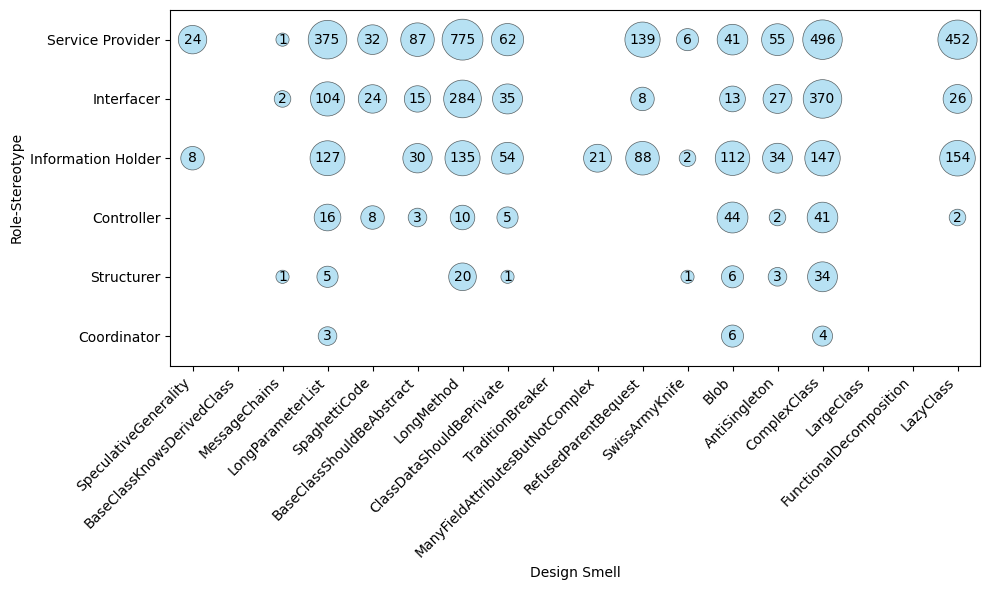

In [70]:
# Prepare the aggregated data
bubble_data = desktop_bubble_data.set_index('label')

# X-axis: Design smells
# Y-axis: Role stereotypes
x_labels = bubble_data.columns.tolist()
y_labels = bubble_data.index.tolist()

x_coords, y_coords, sizes, labels = [], [], [], []

# Before your plotting loop, ensure numeric:
bubble_data = bubble_data.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Now this will work safely:
for x_idx, smell in enumerate(x_labels):
    for y_idx, role in enumerate(y_labels):
        count = bubble_data.loc[role, smell]
        if count > 0:
            x_coords.append(x_idx)
            y_coords.append(y_idx)
            sizes.append(np.log10(count + 1) * 300)
            labels.append(str(count))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    x_coords, y_coords, s=sizes,
    alpha=0.6, color="skyblue", edgecolors="black", linewidth=0.5
)

# Annotate with exact counts
for (x, y, label_text) in zip(x_coords, y_coords, labels):
    ax.text(x, y, label_text, ha='center', va='center', fontsize=10)

# Configure axes
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
ax.set_xlabel("Design Smell")
ax.set_ylabel("Role-Stereotype")
# ax.set_title("Matrix-Based Bubble Plot (Log-Scaled) of Design Smells vs. Role-Stereotypes (Axes Switched)")

ax.set_xlim(-0.5, len(x_labels) - 0.5)
ax.set_ylim(-0.5, len(y_labels) - 0.5)

plt.tight_layout()
plt.savefig('desktop_matrix_bubble_plot.pdf', dpi=1200, format='pdf')
plt.show()